Import library

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Dropout
from tensorflow.keras.optimizers import Adam

Download dataset

In [43]:
from google.colab import drive

# Download the file using gdown
!gdown https://drive.google.com/uc?id=1E2PanMzF2oOlBbpLY1PCR4HQYVoeQ4PT # location file gdrive
print('Data source downloaded successfully.')

Downloading...
From: https://drive.google.com/uc?id=1E2PanMzF2oOlBbpLY1PCR4HQYVoeQ4PT
To: /content/weather.csv
100% 1.79M/1.79M [00:00<00:00, 106MB/s]
Data source downloaded successfully.


Load dataset

In [8]:
weather_df = pd.read_csv("weather.csv")

Filter for {city}

In [9]:
city = "Toledo"
city_df = weather_df[weather_df["Station.City"] == city].copy()

Convert to datetime and sort

In [10]:
city_df["Date.Full"] = pd.to_datetime(city_df["Date.Full"])
city_df = city_df.sort_values("Date.Full", kind='quicksort')

Show the data

In [11]:
city_df.head()

,Data.Precipitation,Date.Full,Date.Month,Date.Week of,Date.Year,Station.City,Station.Code,Station.Location,Station.State,Data.Temperature.Avg Temp,Data.Temperature.Max Temp,Data.Temperature.Min Temp,Data.Wind.Direction,Data.Wind.Speed
222,0.00,2016-01-03,1,3,2016,Toledo,TOL,"Toledo, OH",Ohio,29,31,25,26,12.70
537,0.85,2016-01-10,1,10,2016,Toledo,TOL,"Toledo, OH",Ohio,29,39,19,16,5.31
852,0.53,2016-01-17,1,17,2016,Toledo,TOL,"Toledo, OH",Ohio,23,30,16,24,11.81
1167,0.03,2016-01-24,1,24,2016,Toledo,TOL,"Toledo, OH",Ohio,17,25,9,18,7.87
1482,0.06,2016-01-31,1,31,2016,Toledo,TOL,"Toledo, OH",Ohio,33,43,27,23,10.71


Normalize average temperature

In [12]:
scaler = MinMaxScaler()
city_df["ScaledTemp"] = scaler.fit_transform(city_df[["Data.Temperature.Avg Temp"]])

In [13]:
city_df["ScaledTemp"].head()

222     0.209677
537     0.209677
852     0.112903
1167    0.016129
1482    0.274194
Name: ScaledTemp, dtype: float64

Create sequence

In [51]:
sequence_length = 2
X, y = [], []
temps = city_df["ScaledTemp"].values

for i in range(len(temps) - sequence_length):
    X.append(temps[i:i + sequence_length])
    y.append(temps[i + sequence_length])

X = np.array(X)
y = np.array(y)
X = X.reshape((X.shape[0], X.shape[1], 1))

Split train/test

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

Build RNN model

In [53]:
model = Sequential([
    SimpleRNN(64, activation='tanh', return_sequences=True, input_shape=(sequence_length, 1)),
    Dropout(0.2),
    SimpleRNN(32, activation='tanh'),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

C:\Users\Ahmad Riyo Alfath\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Train model

In [54]:
model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 731ms/step - loss: 0.3499 - val_loss: 0.0189
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 0.1055 - val_loss: 0.0594
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 0.0609 - val_loss: 0.1234
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 0.0977 - val_loss: 0.1359
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 0.1504 - val_loss: 0.0960
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.0633 - val_loss: 0.0505
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.0756 - val_loss: 0.0283
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 0.0565 - val_loss: 0.0209
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 0.0692 - val_loss: 0.0197
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 0.0746 - val_loss: 0.0223
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 0.0568 - val_loss: 0.0295
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 0.0733 - val_loss: 0.0414


Predict

In [55]:
predictions = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


Inverse scale predictions and actual values

In [56]:
y_pred = scaler.inverse_transform(predictions)
y_true = scaler.inverse_transform(y_test.reshape(-1, 1))

Evaluate using regression metrics

In [57]:
mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)

print("\nEvaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


Evaluation Metrics:
Mean Squared Error (MSE): 86.39
Mean Absolute Error (MAE): 7.58
Root Mean Squared Error (RMSE): 9.29
R² Score: 0.4380


Plot actual vs predicted

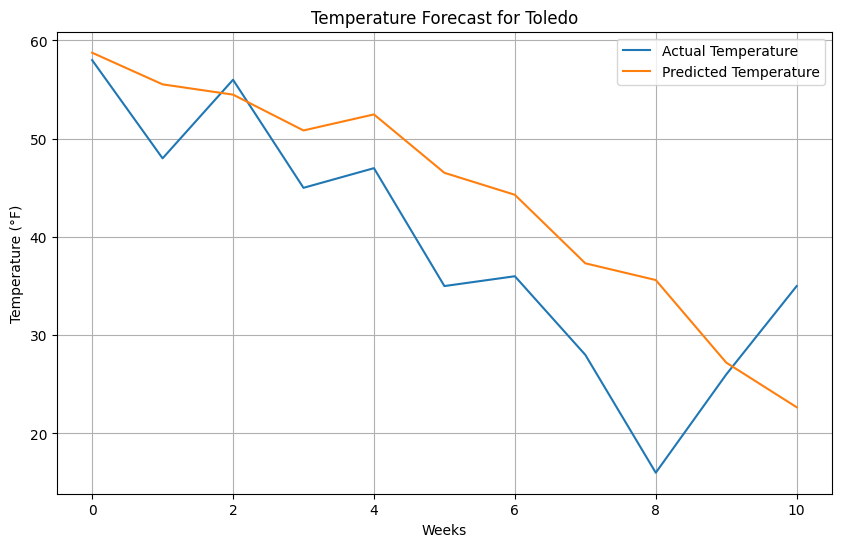


Actual vs Predicted Temperatures (°F):
Week 1: Actual = 58.00 °F, Predicted = 58.75 °F
Week 2: Actual = 48.00 °F, Predicted = 55.53 °F
Week 3: Actual = 56.00 °F, Predicted = 54.49 °F
Week 4: Actual = 45.00 °F, Predicted = 50.84 °F
Week 5: Actual = 47.00 °F, Predicted = 52.47 °F
Week 6: Actual = 35.00 °F, Predicted = 46.53 °F
Week 7: Actual = 36.00 °F, Predicted = 44.29 °F
Week 8: Actual = 28.00 °F, Predicted = 37.32 °F
Week 9: Actual = 16.00 °F, Predicted = 35.61 °F
Week 10: Actual = 26.00 °F, Predicted = 27.21 °F
Week 11: Actual = 35.00 °F, Predicted = 22.67 °F


In [58]:
# Plot actual vs predicted temperatures
plt.figure(figsize=(10, 6))
plt.plot(y_true, label='Actual Temperature')
plt.plot(y_pred, label='Predicted Temperature')
plt.title(f"Temperature Forecast for {city}")
plt.xlabel("Weeks")
plt.ylabel("Temperature (°F)")
plt.legend()
plt.grid(True)
plt.show()

# Print predicted vs actual temperature values side by side
print("\nActual vs Predicted Temperatures (°F):")
for i in range(len(y_true)):
    actual = y_true[i][0]
    predicted = y_pred[i][0]
    print(f"Week {i+1}: Actual = {actual:.2f} °F, Predicted = {predicted:.2f} °F")

Get the last 4 known scaled values from the dataset

In [59]:
last_4_weeks = city_df[["Date.Full", "Data.Temperature.Avg Temp"]].tail(4).reset_index(drop=True)

Predict next 2 weeks

In [60]:
# Get the last 4 actual scaled temps
last_sequence = temps[-sequence_length:].tolist()
sequence_input = np.array(last_sequence).reshape(1, sequence_length, 1)

# Predict next week's temperature
next_week_scaled = model.predict(sequence_input)
next_week_temp = scaler.inverse_transform(next_week_scaled)[0][0]

# Append predicted temp, shift sequence, predict 2nd week
next_input = last_sequence[1:] + [next_week_scaled[0][0]]
next_input_array = np.array(next_input).reshape(1, sequence_length, 1)

# Predict 2 weeks ahead
week_after_scaled = model.predict(next_input_array)
week_after_temp = scaler.inverse_transform(week_after_scaled)[0][0]

# Get the current week's temperature (last actual temp)
current_temp = scaler.inverse_transform([[last_sequence[-1]]])[0][0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Prediction

In [61]:
print("\nLast 4 Weeks of Average Temperatures:")
for i, row in last_4_weeks.iterrows():
    print(f"Week {i+1}: {row['Date.Full'].date()} - {row['Data.Temperature.Avg Temp']:.2f} °F")
print(f"\nCurrent week's actual temperature: {current_temp:.2f} °F")
print(f"Predicted temperature for next week: {next_week_temp:.2f} °F")
print(f"Predicted temperature for week after next: {week_after_temp:.2f} °F")


Last 4 Weeks of Average Temperatures:
Week 1: 2016-12-11 - 28.00 °F
Week 2: 2016-12-18 - 16.00 °F
Week 3: 2016-12-25 - 26.00 °F
Week 4: 2017-01-01 - 35.00 °F

Current week's actual temperature: 35.00 °F
Predicted temperature for next week: 31.48 °F
Predicted temperature for week after next: 36.01 °F
